In [2]:
import numpy as np
import h5py
from pathlib import Path
from extra_geom import AGIPD_1MGeometry
from cxiapi import cxiData, calibrateModule
from cxiapi.hitsAnalyzer import hitsAnalyzer
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from p_tqdm import p_umap, p_map
from functools import partial

In [3]:
analyzer = hitsAnalyzer('r0372_hits.h5')
cxi = analyzer.cxi
analyzer.input.keys()

dict_keys(['cxi_adu_per_photon', 'cxi_calib_folder', 'cxi_fname', 'cxi_gain_mode', 'cxi_geom_file', 'frame_indices', 'hits_ROI_value', 'hits_module', 'hits_photon_thresh', 'intensity_scores_ROI', 'lit_pixels_ROI', 'lit_pixels_module', 'module_masks', 'run'])

## Read some random data

Text(0.5, 1.0, 'Mask removed')

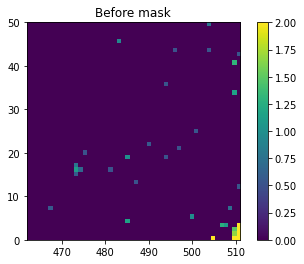

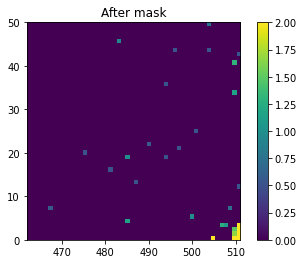

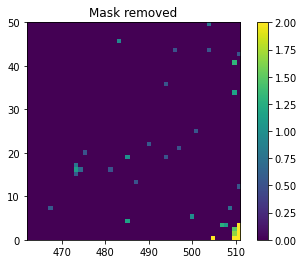

In [41]:
module_index = analyzer.hits_module
# Clean masks
cxi.cleanModuleMasks()

plot_idx = 300

# ROI
ROI_module = [(512-50,None), (None,51)]
# Mask
cxi.plot(plot_idx,module_index,ADU=False,ROI_value=ROI_module,transpose=True, vmax=2)
plt.title('Before mask')

mask = np.ones((512,128))
mask[470:475,15:18] = 0
cxi.setModuleMasks(15,mask)
cxi.plot(plot_idx,module_index,ADU=False,ROI_value=ROI_module,transpose=True,vmax=2)
plt.title('After mask')

cxi.cleanModuleMasks()
cxi.plot(plot_idx,module_index,ADU=False,ROI_value=ROI_module,transpose=True,vmax=2)
plt.title('Mask removed')

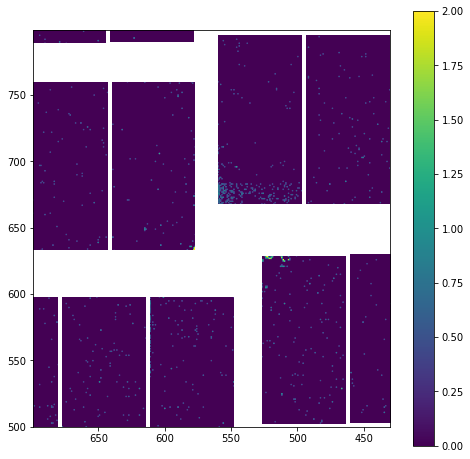

In [48]:
# Assembled image zoomed 
ROI_append = ((500,800), (430,700))
cxi.plot(300, ROI_value=ROI_append, ADU=False, vmax=2)

## Hits analysis

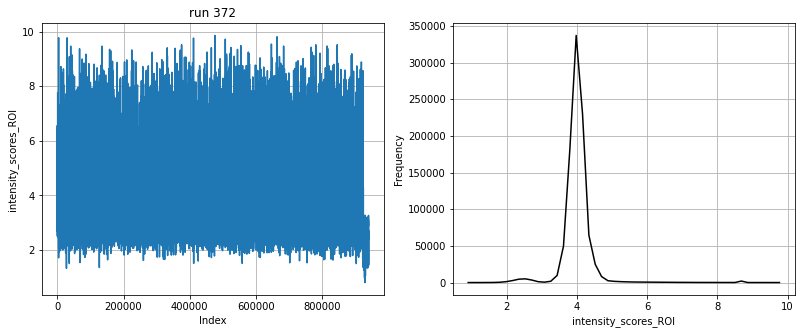

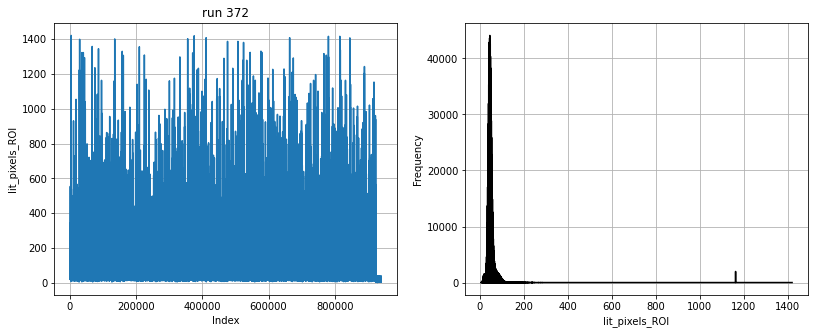

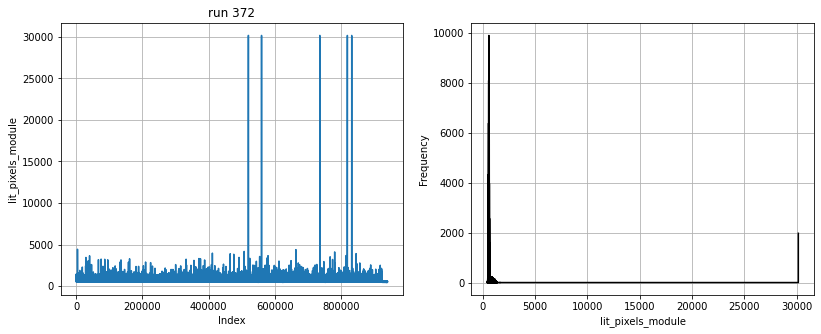

In [32]:
analyzer.plotFrameScores()

In [50]:
cxi.setGainMode(0)

In [ ]:
analyzer.plotHits(num_max = 100,order='descending',lpm_lim=[0,5000], vmax=5, save_folder='./hits/')

In [10]:
%matplotlib inline

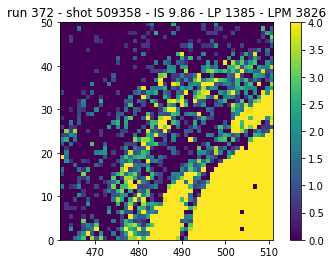

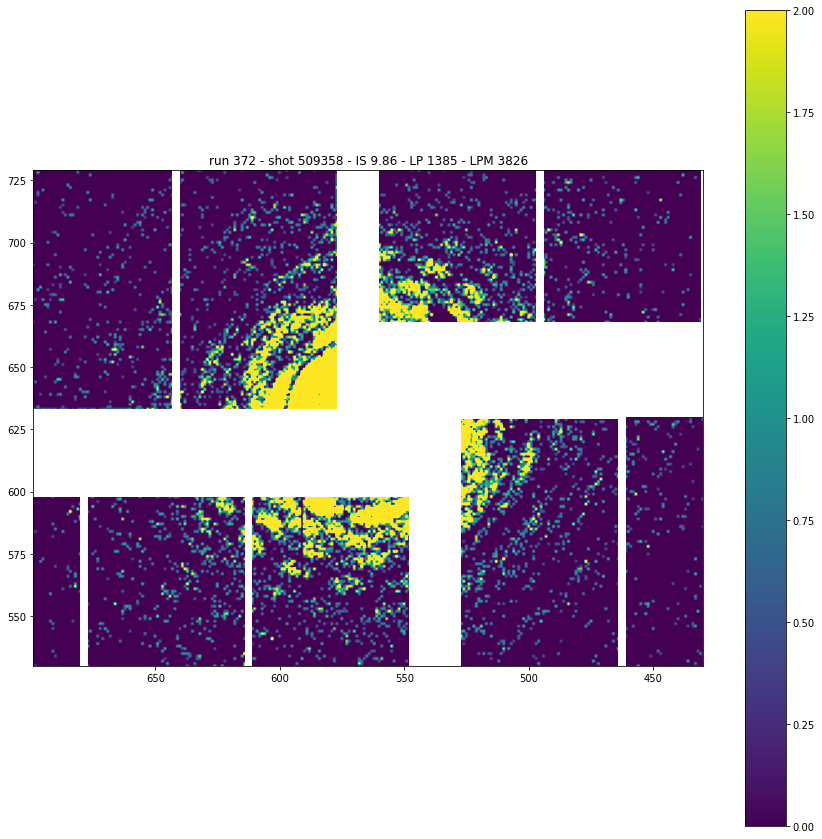

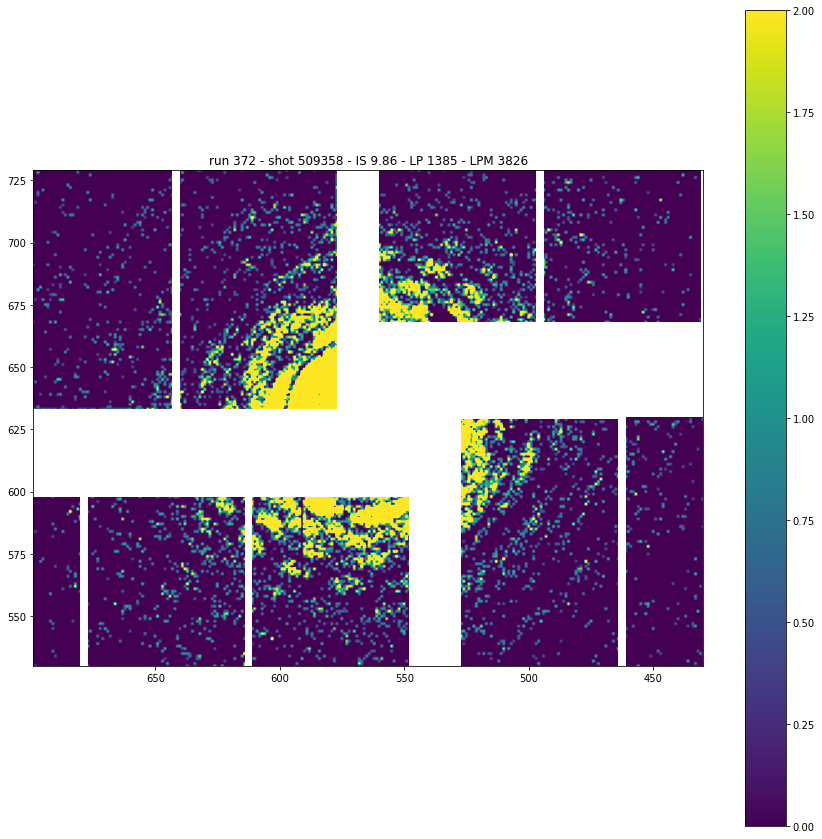

In [7]:
idx=509358
ROI_append = ((530,730), (430,700))
analyzer.plotHitModuleLocal(idx)
analyzer.plotHitAppendLocal(idx, ROI_value=ROI_append, vmax=2, figsize=(15,15))
analyzer.plotHitAppend(idx, ROI_value=ROI_append, vmax=2, figsize=(15,15))

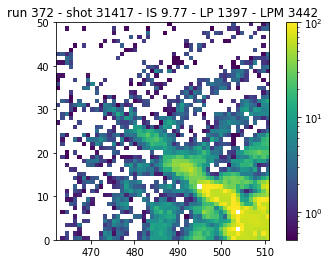

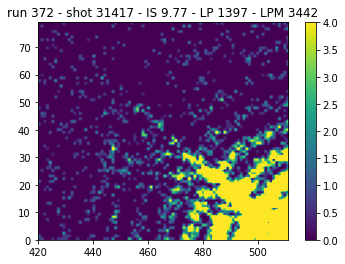

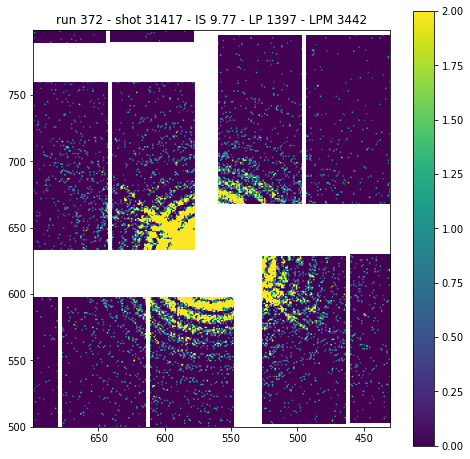

In [7]:
idx=31417
ROI_module = ((420,515), (None,80))
ROI_append = ((500,800), (430,700))

analyzer.plotHitModuleLocal(idx, vmax=1e2, norm=colors.LogNorm())
analyzer.plotHitModuleLocal(idx, ROI_value=ROI_module)
analyzer.plotHitAppendLocal(idx, ROI_value = ROI_append, vmax=2)

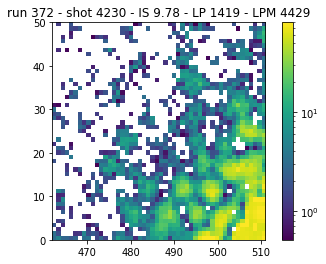

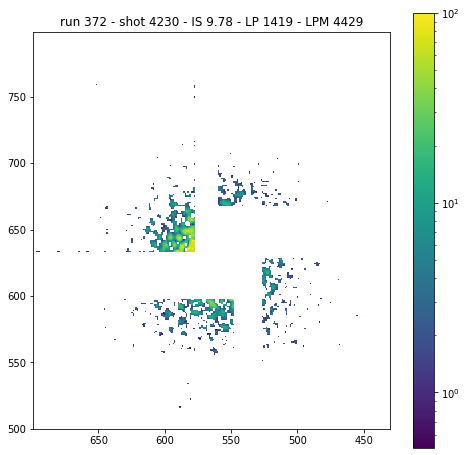

In [77]:
ROI_append = ((500,800), (430,700))
idx=4230
analyzer.plotHitModuleLocal(idx, vmax=80, norm=colors.LogNorm())
analyzer.plotHitAppendLocal(idx, ROI=ROI_append,vmax=100, norm=colors.LogNorm())